<a href="https://colab.research.google.com/github/Prabhutva/OpenCV-Design/blob/master/Designing_Posts_Using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

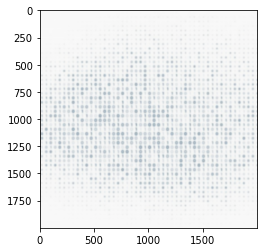

In [5]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

img=cv2.imread(r'./img/back.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
kernel=np.ones((111,111),np.float)/12321

img2=cv2.GaussianBlur(img,(33,33),0)
plt.imshow(img2)

backup = img2

In [6]:
def overlay_transparent(background, overlay, x, y):

    background_width = background.shape[1]
    background_height = background.shape[0]

    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]

    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.ones((overlay.shape[0], overlay.shape[1], 1), dtype = overlay.dtype) * 255
            ],
            axis = 2,
        )

    overlay_image = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0
    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_image

    return background


def resimage(image, percentsize):
    scale_percent = percentsize # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized

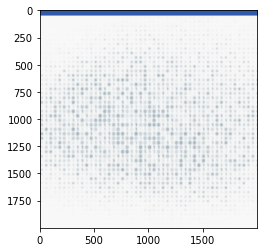

In [7]:
overlay = img2.copy()
alpha = 0.8  # Transparency factor.
poly=np.array([[0,0],[1999,0],[1999,50],[0,50]],dtype=np.int32)
poly_new=poly.reshape((-1,1,2))
cv2.fillPoly(overlay,[poly_new],color=(0,51,153,45))

background = cv2.addWeighted(overlay, alpha, img2, 1 - alpha, 0)
plt.imshow(background)

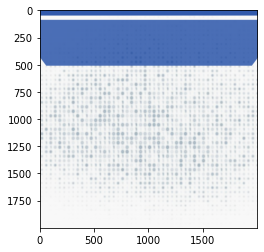

In [8]:
overlay = background.copy()
alpha = 0.7  # Transparency factor.
poly=np.array([[-325+67,90],[2325-67,90],[1943,510],[57,510]],dtype=np.int32)
poly_new=poly.reshape((-1,1,2))
cv2.fillPoly(overlay,[poly_new],color=(0,51,153,45))

background = cv2.addWeighted(overlay, alpha, background, 1 - alpha, 0)
plt.imshow(background)

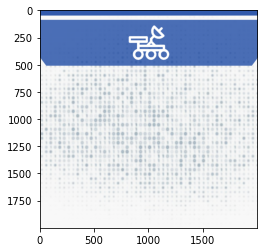

In [9]:
rover=cv2.imread(r'./img/rover.png', cv2.IMREAD_UNCHANGED)
rover=cv2.cvtColor(rover,cv2.COLOR_BGRA2RGBA)

rovers = resimage(rover, 200)

background = overlay_transparent(background, rovers, 800, 100)
plt.imshow(background)

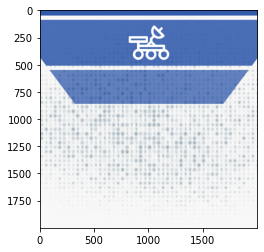

In [10]:
overlay = background.copy()
alpha = 0.6  # Transparency factor.
poly=np.array([[87,550],[1913,550],[1680,860],[320,860]],dtype=np.int32)
poly_new=poly.reshape((-1,1,2))
cv2.fillPoly(overlay,[poly_new],color=(0,51,153,45))

background = cv2.addWeighted(overlay, alpha, background, 1 - alpha, 0)
plt.imshow(background)

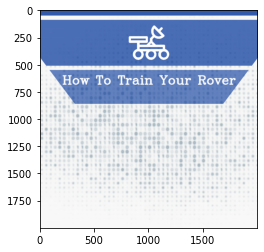

In [11]:
cv2.putText(background,  
       "How To Train Your Rover",  
       (205, 680),  
       fontFace=cv2.FONT_HERSHEY_COMPLEX,  
       fontScale=3.65,  
       thickness = 10,
       color=(250,250,250))
plt.imshow(background)

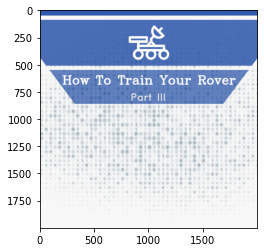

In [12]:
cv2.putText(background,  
       "Part III",  
       (830, 830),  
       fontFace=cv2.FONT_HERSHEY_DUPLEX,  
       fontScale=3,  
       thickness = 5,
       color=(230,230,230))
plt.imshow(background)

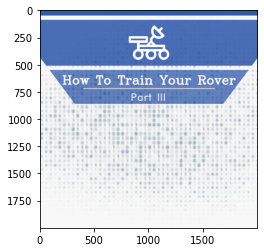

In [13]:
cv2.line(background,pt1=(400,720),pt2=(1600,720),color=(200,200,200),thickness=10)
plt.imshow(background)

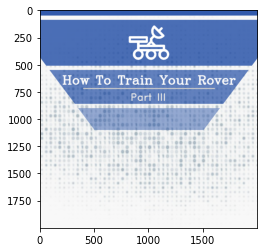

In [14]:
overlay = background.copy()
alpha = 0.4  # Transparency factor.
poly=np.array([[350,900],[1650,900],[1500,1100],[500,1100]],dtype=np.int32)
poly_new=poly.reshape((-1,1,2))
cv2.fillPoly(overlay,[poly_new],color=(0,51,153,45))

background = cv2.addWeighted(overlay, alpha, background, 1 - alpha, 0)
plt.imshow(background)

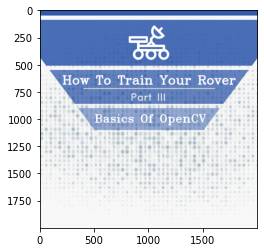

In [15]:
cv2.putText(background,  
       "Basics Of OpenCV",  
       (500, 1030),  
       fontFace=cv2.FONT_HERSHEY_TRIPLEX,  
       fontScale=3.4,  
       thickness = 5,
       color=(255,255,255))

plt.imshow(background)

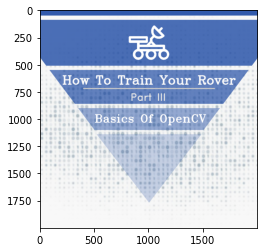

In [16]:
overlay = background.copy()
alpha = 0.2  # Transparency factor.
poly=np.array([[1480,1140],[520,1140],[1000,1767]],dtype=np.int32)
poly_new=poly.reshape((-1,1,2))
cv2.fillPoly(overlay,[poly_new],color=(0,51,153,45))

background = cv2.addWeighted(overlay, alpha, background, 1 - alpha, 0)
plt.imshow(background)

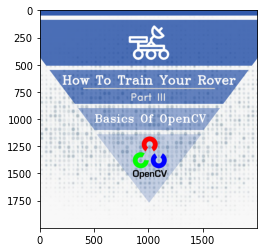

In [17]:
logo=cv2.imread(r'./img/logo.png', cv2.IMREAD_UNCHANGED)
logo=cv2.cvtColor(logo,cv2.COLOR_BGRA2RGBA)


logos = resimage(logo, 38)

background = overlay_transparent(background, logos, 850, 1160)
plt.imshow(background)

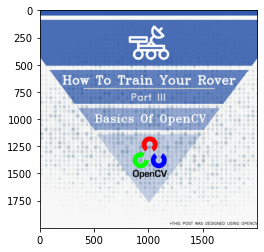

In [18]:
cv2.putText(background,  
       "*THIS POST WAS DESIGNED USING OPENCV",  
       (1190, 1970),  
       fontFace=cv2.FONT_HERSHEY_SIMPLEX,  
       fontScale=1.2,  
       thickness =2,
       color=(0,0,0))

plt.imshow(background)

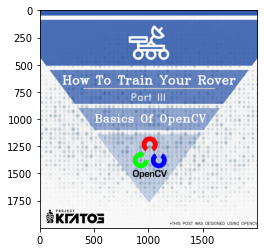

In [19]:
klogo=cv2.imread(r'./img/kratoslogo.png', cv2.IMREAD_UNCHANGED)
klogo=cv2.cvtColor(klogo,cv2.COLOR_BGRA2RGBA)


klogos = resimage(klogo, 7)

background = overlay_transparent(background, klogos, 10, 1800)
plt.imshow(background)

In [20]:
background=cv2.cvtColor(background,cv2.COLOR_RGB2BGR)
cv2.imwrite("./img/change.png", background)

True